<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/R%20program%20lab8_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 8: Regression and Inference (25 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






####<font color=red>Task 0</font>  (1 points)

Load the copd dataset using the following script.

Note the data in this lab is processed differently than required for the project, however, tasks closely parallel what is required for the project.


In [ ]:
# load copd dataset
copd <- read.csv('https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv', header = TRUE)

# removes all missing -1 values (ignore)
copd <- copd[-unique(unlist(lapply(copd, function(x) {which(x == -1)}))),]
copd <- na.omit(copd)[, -ncol(copd)]

head(copd)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,smoking_status,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,Current smoker,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,Current smoker,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,Former smoker,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827
10,10047G,2008,4/15/2008,81.0,Female,White,165.1,74.0,116,78,⋯,Former smoker,5.3517,5.883040,3.3236,30.46070,-853.408,-763.868,0.61,1.411,2.319
14,10056H,2008,2/15/2008,48.7,Female,White,153.7,86.2,100,53,⋯,Former smoker,4.8654,11.383200,4.0606,47.88110,-836.281,-797.471,0.29,0.374,1.281
16,10060Y,2008,5/15/2008,72.8,Male,White,177.0,89.6,147,71,⋯,Former smoker,7.3304,19.262300,5.3342,53.47470,-867.254,-821.256,0.29,0.706,2.424


<br>

---

<br>






####<font color=red>Task 1</font>  (10 points)

1. Create a scatterplot using `pct_gastrapping` on the y-axis and `FEV1` on the x-axis. Describe what you observe in complete sentences.
  * `FEV1` is volume (liters) of air a patient is able to exhale in one second (higher values typically suggest healthier lungs)
  * `pct_gastrapping` is the percentage of lung STILL filled with air after exhaling (this is bad). Higher values suggest airway dysfunction. 

2. Is the relationship between `pct_gastrapping` and `FEV1` linear or quadratic? Explain in complete sentences.

3. Fit a linear regression model using `pct_gastrapping` as your response (y-variable). Show the summary of the regression using `summary()`

4. What is the slope of the regression line? Explain what this means in the context of gas trapping and FEV1 in complete sentences.

5. Is the slope significantly different from zero? Explain why or why not in complete sentences. Also, explain what significance means in the context of the copd application.


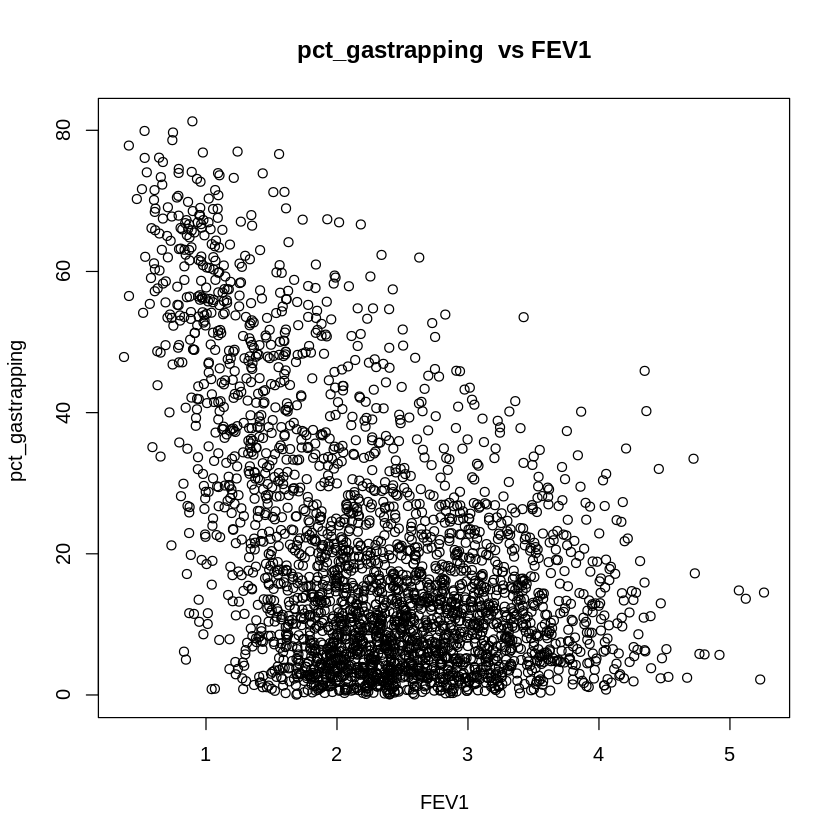

In [ ]:
#1.1
plot(copd$FEV1, copd$pct_gastrapping ,
     xlab = "FEV1",
     ylab = "pct_gastrapping ",
     main = "pct_gastrapping  vs FEV1")

1.2 Linear. Overall plots tend to distribute similarly. AS FEV1 goes up  percentage of lung filled with air is increasing. 

In [ ]:
#1.3
fit <- lm(pct_gastrapping ~ FEV1, data = copd)
class(fit)
summary(fit)

[1] "lm"


Call:
lm(formula = pct_gastrapping ~ FEV1, data = copd)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.382 -11.594  -2.200   9.526  48.864 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.2207     0.8505   51.99   <2e-16 ***
FEV1        -10.5591     0.3439  -30.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.31 on 2759 degrees of freedom
Multiple R-squared:  0.2546,	Adjusted R-squared:  0.2544 
F-statistic: 942.6 on 1 and 2759 DF,  p-value: < 2.2e-16


1.4 The slope of the regression line is -10.5591 As the FEV1 goes up the percentage of gastrpping is going higher.

1.5 Yes it is. Since p-value < 0.05, so the parameter is significantly different from zero. FEV1 is significantly correlated with percentage of gastrapping. 

<br>

---

<br>






####<font color=red>Task 2</font>  (8 points)

1. Create a boxplot of `pct_gastrapping` vs `emphysema`. Describe what you observe in complete sentences
  * `emphysema` is the clinician determined emphysema diagnosis and has three categories (Yes, No, unknown)

2. Fit a linear regression model using `pct_gastrapping` as your response (y-variable) and `emphysema` as your x-variable. Show the summary of the regression using `summary()`.
  * `emphysemaunknown` refers to the average difference in percent gas trapping between `unknown` and `No`
  * `emphysemaYes` refers to the average difference in percent gas trapping between `Yes` and `No`

3. Based on Task 2.2, what is the average difference in percent gas trapping between patients with emphysema and without emphysema? Answer in a complete sentence.

4. Is percent gas trapping among patients with emphysema significantly greater or less than the percent gas trapping among patients without emphysema? Explain your answer in the context of the copd data.

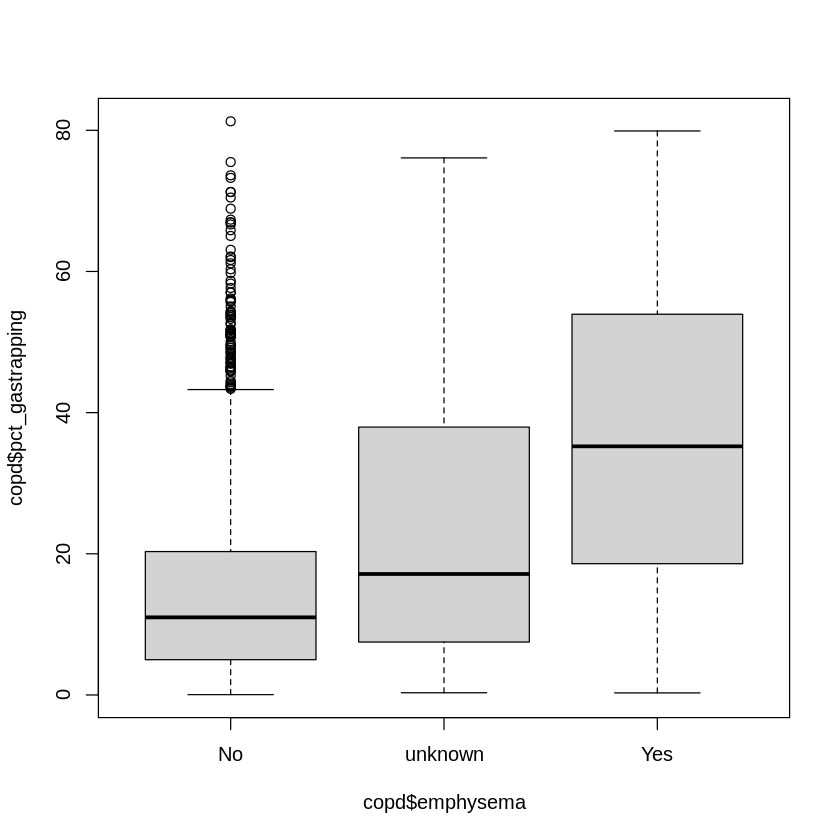

In [ ]:
#2.1
boxplot(copd$pct_gastrapping ~ copd$emphysema )

In [ ]:
#2.2
fit <- lm(pct_gastrapping ~ emphysema, data = copd)
class(fit)
summary(fit)

[1] "lm"


Call:
lm(formula = pct_gastrapping ~ emphysema, data = copd)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.226 -10.481  -3.536   8.175  66.632 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       14.6368     0.3429  42.688   <2e-16 ***
emphysemaunknown   9.7580     1.1720   8.326   <2e-16 ***
emphysemaYes      21.8871     0.7395  29.599   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.41 on 2758 degrees of freedom
Multiple R-squared:  0.245,	Adjusted R-squared:  0.2445 
F-statistic: 447.5 on 2 and 2758 DF,  p-value: < 2.2e-16


2.3 The average difference in percent gas trapping between patients with emphysema and without emphysema is 21.8871

2.4 Yes it is. Because p value < 0.05, so gas trapping between patients with emphysema and without emphysema are significantly correlated with each other.

<br>

---

<br>






####<font color=red>Task 3</font>  (5 points)

1. Fit regressions with multiple predictors (independent variables) using `pct_gastrapping` as the response (dependent variable)

2. Predictor variables can be
  * linear, quadratic, cubic, etc.
  * `log()` transformed (e.g., log(pct_emphysema))
  * categorical (these will appear different in the summary)

3. Summarize each regression you fit and find the regression that maximizes adjusted $R^2$. 
  * Adjusted $R^2$ is a measure of the "goodness of fit"
  * A higher adjusted $R^2$ can be considered a better fit
  * Try to maximize this value (i.e. close to 1)
  * We will compare values from each group

4. Based on your "best" regression fit, attempt to interpret the slope parameters
  * estimates, p-values, and confidence intervals (use `confint()`)

In [ ]:
copd <- read.csv('https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv', header = TRUE)

# removes all missing -1 values (ignore)
copd <- copd[-unique(unlist(lapply(copd, function(x) {which(x == -1)}))),]
copd <- na.omit(copd)[, -ncol(copd)]

head(copd)


,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,smoking_status,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,Current smoker,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,Current smoker,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,Former smoker,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827
10,10047G,2008,4/15/2008,81.0,Female,White,165.1,74.0,116,78,⋯,Former smoker,5.3517,5.883040,3.3236,30.46070,-853.408,-763.868,0.61,1.411,2.319
14,10056H,2008,2/15/2008,48.7,Female,White,153.7,86.2,100,53,⋯,Former smoker,4.8654,11.383200,4.0606,47.88110,-836.281,-797.471,0.29,0.374,1.281
16,10060Y,2008,5/15/2008,72.8,Male,White,177.0,89.6,147,71,⋯,Former smoker,7.3304,19.262300,5.3342,53.47470,-867.254,-821.256,0.29,0.706,2.424


In [ ]:
#3
fits <- lm(pct_gastrapping ~ functional_residual_capacity + weight_kg, data = copd)
summary(fits)
confint(fits)


Call:
lm(formula = pct_gastrapping ~ functional_residual_capacity + 
    weight_kg, data = copd)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.365  -7.497  -0.963   6.365  41.158 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -4.16400    1.19197  -3.493 0.000484 ***
functional_residual_capacity 12.99759    0.21633  60.082  < 2e-16 ***
weight_kg                    -0.20899    0.01162 -17.977  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.45 on 2758 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.5828 
F-statistic:  1928 on 2 and 2758 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-6.5012543,-1.8267556
functional_residual_capacity,12.5733954,13.4217758
weight_kg,-0.2317799,-0.1861908
